# ::: GRADES :::

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [113]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [114]:
df.fillna(df.mean,inplace=True)

In [115]:
grade_mapping = {
    'A+': 5.0,
    'A': 4.0,
    'A-': 3.7,
    'B+': 3.3,
    'B': 3.0,
    'B-': 2.7,
    'C+': 2.3,
    'C': 2.0,
    'C-': 1.7,
    'D+': 1.3,
    'D': 1.0,
    'D-': 0.7,
    'F': 0.0
}


df.replace(grade_mapping, inplace=True)

In [116]:
df.describe()

,HS-101,CS-105,CGPA
count,571.000000,571.000000,571.000000
mean,2.610508,3.387391,2.954888
std,0.925712,0.911514,0.620552
min,0.000000,1.000000,0.800000
25%,2.000000,3.000000,2.538000
50%,2.700000,3.700000,3.029000
75%,3.300000,4.000000,3.451000
max,5.000000,5.000000,3.985000


In [117]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [118]:
df.dtypes

Seat No.      object
PH-121        object
HS-101       float64
CY-105        object
HS-105/12     object
MT-111        object
CS-105       float64
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

<Axes: >

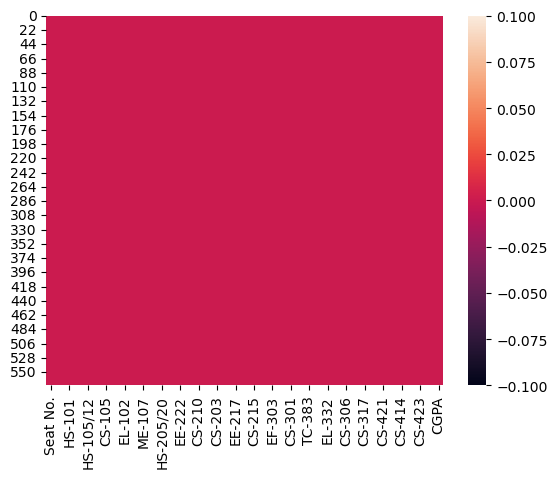

In [119]:
sns.heatmap(df.isnull())

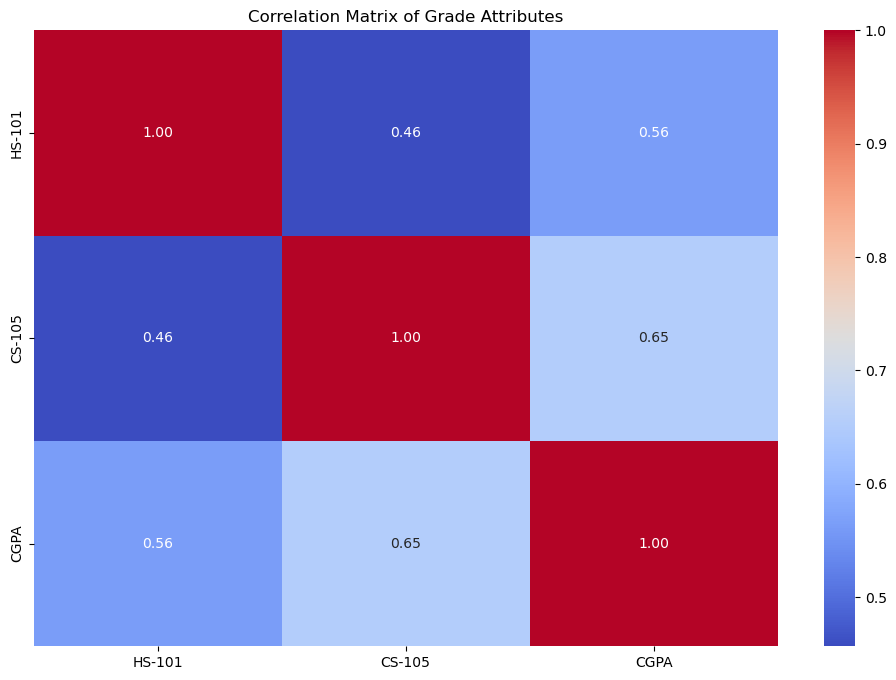

In [120]:
plt.figure(figsize=(12,8),facecolor="white")
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='coolwarm',linecolor="black",cbar=True)
plt.title("Correlation Matrix of Grade Attributes")
plt.show()

In [121]:
specific_value='WU'
for index, row in df.iterrows():
    for column in df.columns:
        if row[column] == specific_value:
            print("Specific value found at index:", index, "and column:", column)
        else:
            print("No specific values found")

No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found
No specific values found


In [122]:
df = df[df.ne(specific_value).all(axis=1)]
df.reset_index(drop=True, inplace=True)


df_numeric = df.apply(pd.to_numeric, errors='coerce')
column_means = df_numeric.mean()
df_filled = df_numeric.fillna(column_means)
df_filled = df_filled.astype(df.dtypes)
df=df_filled

df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,NaN,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,NaN,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,NaN,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,NaN,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,NaN,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,NaN,3.0,4.0,4.0,3.7,5.0,4.0,3.7,3.7,5.0,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
550,NaN,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
551,NaN,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
552,NaN,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [123]:
x = df.iloc[:,1:-1]
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.0,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.7,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,3.0,4.0,4.0,3.7,5.0,4.0,3.7,3.7,5.0,3.3,...,3.3,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0
550,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7
551,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.3,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7
552,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,3.3,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [124]:
y = df.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
549    3.798
550    3.772
551    3.470
552    2.193
553    1.753
Name: CGPA, Length: 554, dtype: float64

<Axes: >

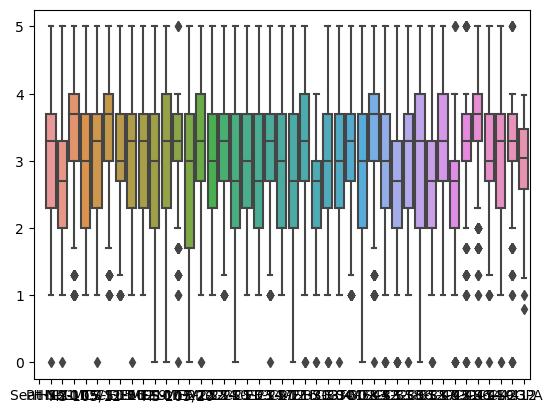

In [125]:
sns.boxplot(df)

In [126]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,NaN,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,NaN,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,NaN,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,NaN,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,NaN,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,NaN,3.0,4.0,4.0,3.7,5.0,4.0,3.7,3.7,5.0,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
550,NaN,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
551,NaN,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
552,NaN,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [127]:
x.shape

(554, 41)

In [128]:
y.shape

(554,)

In [129]:
pd.to_numeric(df['CS-412'], errors='coerce')

0      3.7
1      3.0
2      4.0
3      2.3
4      4.0
      ... 
549    4.0
550    3.7
551    3.7
552    2.0
553    1.7
Name: CS-412, Length: 554, dtype: float64

In [130]:
df_filled

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,NaN,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,NaN,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,NaN,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,NaN,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,NaN,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,NaN,3.0,4.0,4.0,3.7,5.0,4.0,3.7,3.7,5.0,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
550,NaN,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
551,NaN,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
552,NaN,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [131]:
df_filled.sample(15)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
415,NaN,3.3,2.3,4.0,3.3,3.7,3.7,3.0,2.0,3.3,...,4.0,2.7,3.7,3.0,3.3,3.0,3.7,3.0,3.0,3.207
509,NaN,2.0,3.7,4.0,2.3,2.0,2.7,2.3,5.0,2.7,...,3.7,2.7,4.0,2.7,3.0,2.0,2.3,1.3,3.0,2.941
360,NaN,2.0,3.3,4.0,3.7,4.0,4.0,3.7,5.0,3.3,...,5.0,3.0,4.0,3.0,3.296226,3.7,3.0,4.0,3.3,3.618
418,NaN,3.7,3.0,4.0,3.7,3.7,4.0,3.0,4.0,3.7,...,4.0,2.7,3.3,3.3,3.3,3.0,3.0,3.3,3.0,3.477
17,NaN,2.7,1.7,2.0,1.0,1.0,2.3,1.3,3.0,3.3,...,1.0,1.3,1.3,1.0,3.7,2.0,1.7,1.3,1.7,1.787
453,NaN,3.7,3.0,5.0,3.7,4.0,5.0,2.7,4.0,3.3,...,4.0,3.0,4.0,4.0,3.3,3.0,3.3,3.0,3.3,3.528
413,NaN,1.0,1.3,1.0,1.0,1.7,2.0,2.3,2.7,2.0,...,1.0,1.0,1.3,1.0,1.0,3.498358,2.0,3.0,3.272671,1.747
397,NaN,1.0,1.0,3.0,3.0,3.0,2.0,3.0,3.3,1.0,...,4.0,3.0,3.3,3.0,3.296226,3.7,3.0,4.0,3.3,2.779
214,NaN,2.3,3.7,3.7,4.0,2.0,5.0,3.0,3.3,3.0,...,2.0,3.0,3.7,2.3,3.7,4.0,2.7,3.3,3.7,3.023
479,NaN,4.0,4.0,5.0,4.0,5.0,4.0,3.7,4.0,4.0,...,3.7,4.0,4.0,3.3,3.7,3.3,4.0,4.0,3.7,3.878


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
ln = LinearRegression()

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [135]:
x_train.dtypes

PH-121        object
HS-101       float64
CY-105        object
HS-105/12     object
MT-111        object
CS-105       float64
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
dtype: object

In [136]:
y_train.dtype

dtype('float64')

In [137]:
ln.fit(x_train,y_train)

LinearRegression()

In [138]:
y_pred = ln.predict(x_test)

In [139]:
y_pred

array([2.07123632, 2.7445966 , 2.91013722, 3.12314364, 2.38832331,
       3.76043378, 2.61806707, 2.87948307, 1.82082676, 1.99682561,
       2.75962945, 2.90745194, 3.12406261, 3.17103451, 2.46756329,
       2.65852023, 3.26688139, 3.92549844, 2.96068621, 3.7555743 ,
       3.91863841, 3.23856679, 3.4917666 , 2.96513905, 2.61864907,
       2.95685132, 3.92219399, 3.71462935, 3.56431831, 2.92669562,
       2.05685636, 3.60391453, 3.40198252, 3.12740404, 2.56221681,
       2.17239051, 2.63099666, 3.6053227 , 1.508945  , 3.52062622,
       3.15879487, 2.0791214 , 2.54026169, 3.5650426 , 3.41581977,
       3.94538331, 2.67814539, 3.76446528, 3.06040458, 3.02732174,
       2.81046246, 2.78890748, 3.11290734, 2.60532143, 3.24367775,
       2.55535901, 2.59724089, 2.86285373, 2.73570515, 2.34380526,
       3.34670058, 3.39068382, 2.83253269, 3.49102412, 2.28548397,
       3.31187426, 2.44957885, 3.32922862, 3.15810717, 3.70803202,
       3.30714117, 3.31753303, 3.78856991, 3.00033079, 2.71897

In [140]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.005155151827178519
R-squared: 0.9848211888605831
